In [1]:
# step 1

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_boston
from sklearn import preprocessing
import seaborn as sns
from numpy import dot

diabetes = load_diabetes()
target = diabetes.target
diabetes = pd.DataFrame(diabetes.data,columns = diabetes.feature_names)
diabetes['Target'] = target

print("-----")
print(diabetes.info())
print(diabetes.describe())
print(diabetes.head())

print("---- \n")
print("---- \n")
print("the explanatory variables forming the Data matrix are as follows : ")
print("Age, Sex, Body Mass Index, Average Blood Pressure, s1, s2, s3, s4, s5, s6")
print("----")
print("In all there are 10 explanatory variables where s1, s2... represent blood serum samples")
print("---- \n")
print("the response variable is a measure of disease progression one year after baseline")


-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
Target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.4641

In [90]:
# step 2 and step 3

A = diabetes.values
A1 = A[:,:10]
Y = A[:,-1]
print(Y.shape)
print(A1.shape)
tempo = A1.T.dot(A1)
S,V = np.linalg.eig(tempo)
S = np.diag(np.sqrt(S))
U = A1.dot(V).dot(np.linalg.inv(S))

print("----")
print("u matrix : \n", U)
print("----")
print("s matrix : \n", S)
print("----")
print("v matrix : \n", V)
print("----")

U1 = U[:,:4]
V1 = V[:,:4]
S2 = S[:4,:4]

print("----")
print("u1 matrix : \n", U1)
print("----")
print("u1 matrix : \n", U1.shape)
print("----")
print("s2 matrix : \n", S2)
print("----")
print("s2 matrix : \n", S2.shape)
print("----")
print("v1 matrix : \n", V1)
print("----")
print("v1 matrix : \n", V1.shape)
print("----")

reconA1 = dot(U1,S2).dot(V1.T)

print("----")
print("A reduced dimension(true A) : \n", reconA1)

(442,)
(442, 10)
----
u matrix : 
 [[-0.01392323  0.07580288 -0.02552167 ... -0.05470833 -0.06195473
   0.0116758 ]
 [ 0.06714011 -0.05342432 -0.0012091  ...  0.0136082  -0.06206507
  -0.01457234]
 [-0.00645287  0.06365739 -0.03202029 ... -0.06090475 -0.068179
   0.03002638]
 ...
 [ 0.00486658  0.046936   -0.02148683 ...  0.03551357 -0.00277475
   0.04126306]
 [-0.01642849 -0.00818124  0.03762762 ... -0.00568254 -0.03411998
  -0.03543525]
 [ 0.04514401 -0.15480305  0.00209555 ... -0.0856167   0.10091448
  -0.0159263 ]]
----
s matrix : 
 [[2.00604441 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.22160478 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.09816315 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.97748473 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.   

In [92]:
# Step 4 and 5

S_plus = np.linalg.inv(S2)
A1_plus = dot(V1,S_plus).dot(U1.T)

print("Pseudo inverse of A: \n", A1_plus)

print("------ \n")

Beta_coeffs = A1_plus.dot(Y)
print("least squares solution: \n", Beta_coeffs)

Pseudo inverse of A: 
 [[ 0.01195184  0.00492814  0.02911991 ...  0.03534148 -0.04820188
   0.00435512]
 [ 0.02560301 -0.00737319  0.04441564 ...  0.05811091 -0.0521157
  -0.04552088]
 [ 0.01363461 -0.02849124 -0.00568976 ... -0.02512714  0.03592492
  -0.03243538]
 ...
 [-0.00167247 -0.01793895 -0.00647953 ... -0.00640272  0.01673655
  -0.01765141]
 [ 0.00464166 -0.01993408 -0.00598069 ... -0.01648223  0.02202782
  -0.01486461]
 [ 0.01358215 -0.01623084  0.01010382 ...  0.00203176 -0.0004069
  -0.01949962]]
------ 

least squares solution: 
 [ -42.0870096  -245.64309222  512.36225579  267.97959384  -50.18403677
 -123.11996533 -209.68149529  123.70952392  348.41106597  283.8181565 ]


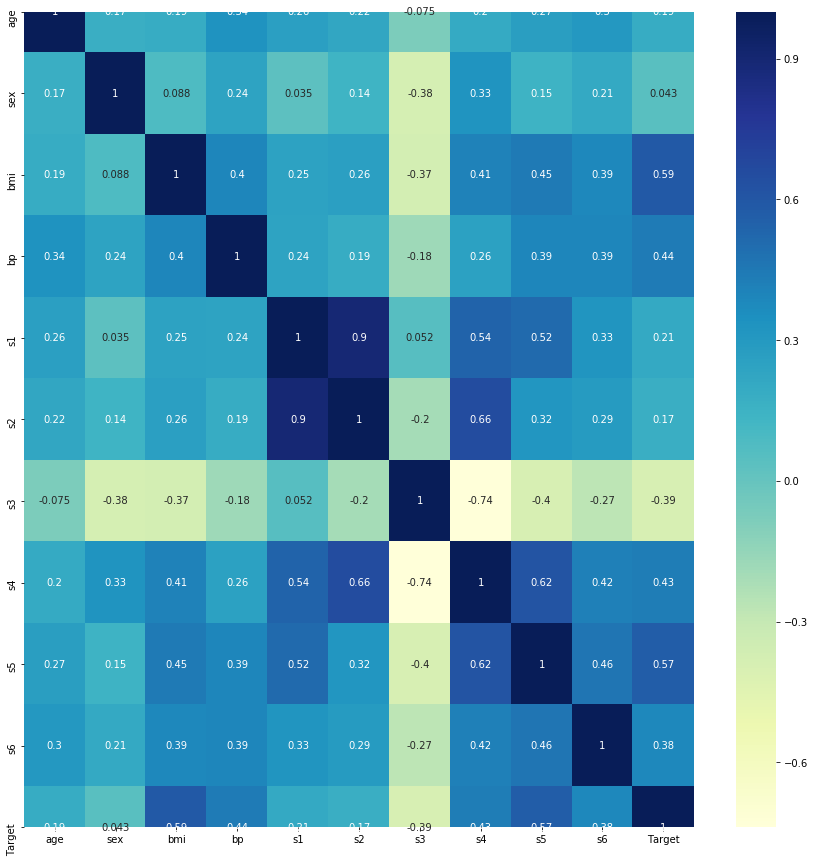

In [95]:
df_3 = pd.DataFrame(A,columns = diabetes.columns)
plt.figure(figsize = (15,15))
sns.heatmap(df_3.corr(),annot = True, cmap = "YlGnBu")

In [96]:
print("SVD is consistent with the correlation matrix that also specifies")
print("that the most important variables in the system with")
print("high correlation with response Target are : ")
print("----")
print("s4, s5, bmi and bp")

SVD is consistent with the correlation matrix that also specifies
that the most important variables in the system with
high correlation with response Target are : 
----
s4, s5, bmi and bp


Target vs bmi
----- 



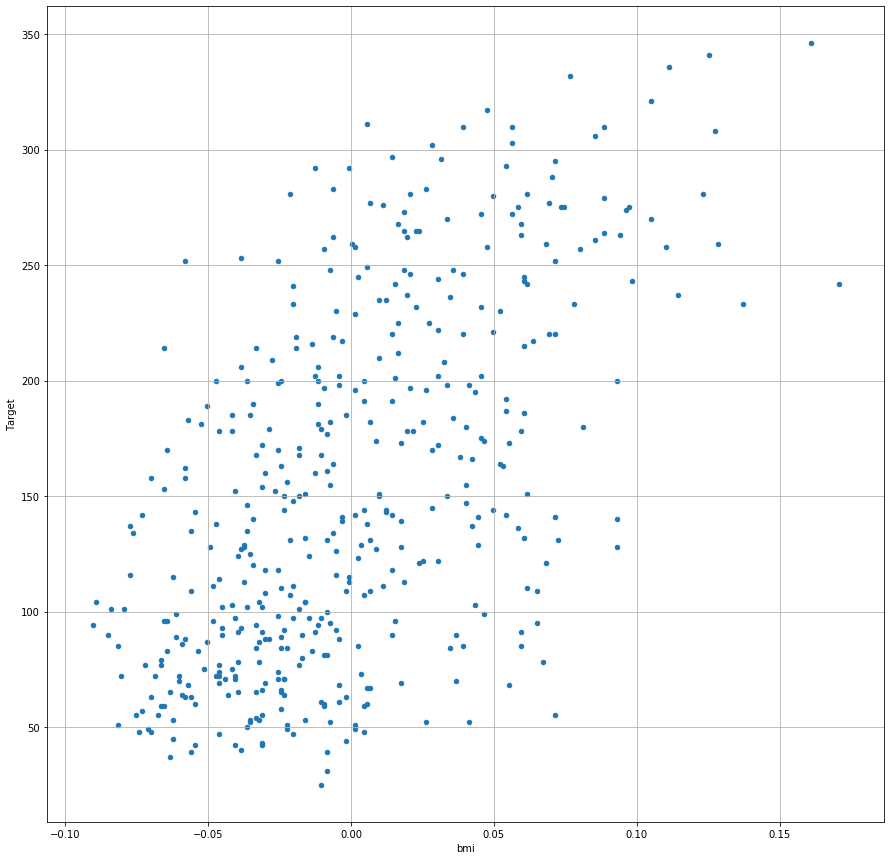

In [99]:
print("Target vs bmi")
print("----- \n")
df_3.plot.scatter(x = "bmi", y = "Target", figsize = (15,15), grid = True)

Target vs s5
----- 



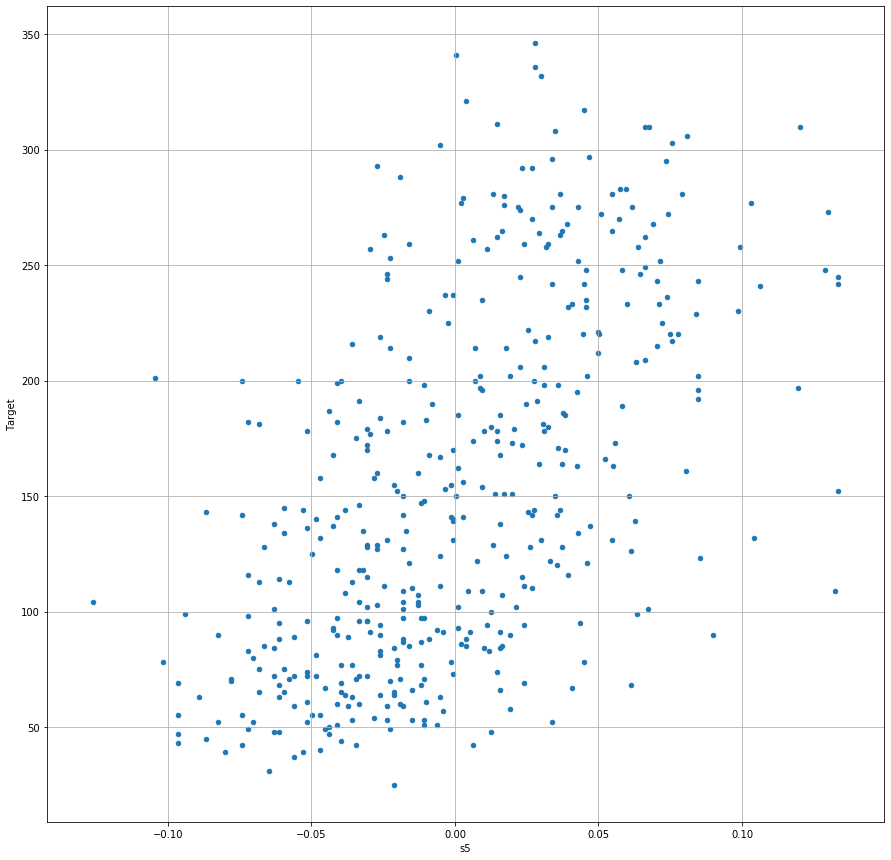

In [100]:
print("Target vs s5")
print("----- \n")
df_3.plot.scatter(x = "s5", y = "Target", figsize = (15,15), grid = True)

Target vs s3
----- 



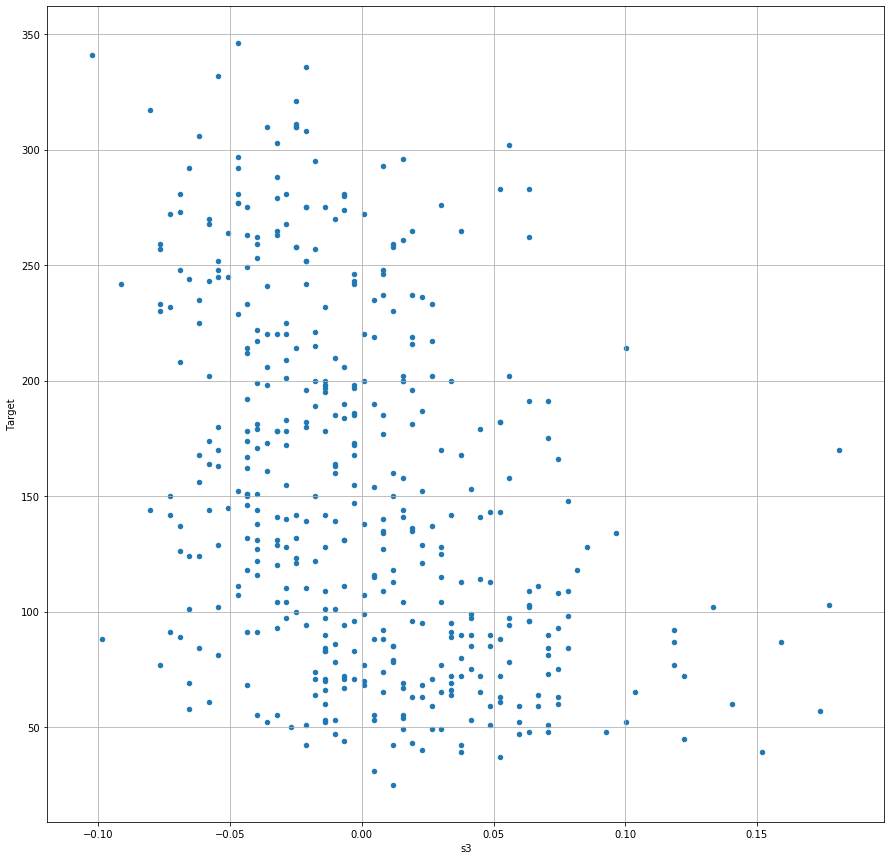

In [103]:
print("Target vs s3")
print("----- \n")
df_3.plot.scatter(x = "s3", y = "Target", figsize = (15,15), grid = True)

Target vs bp
----- 



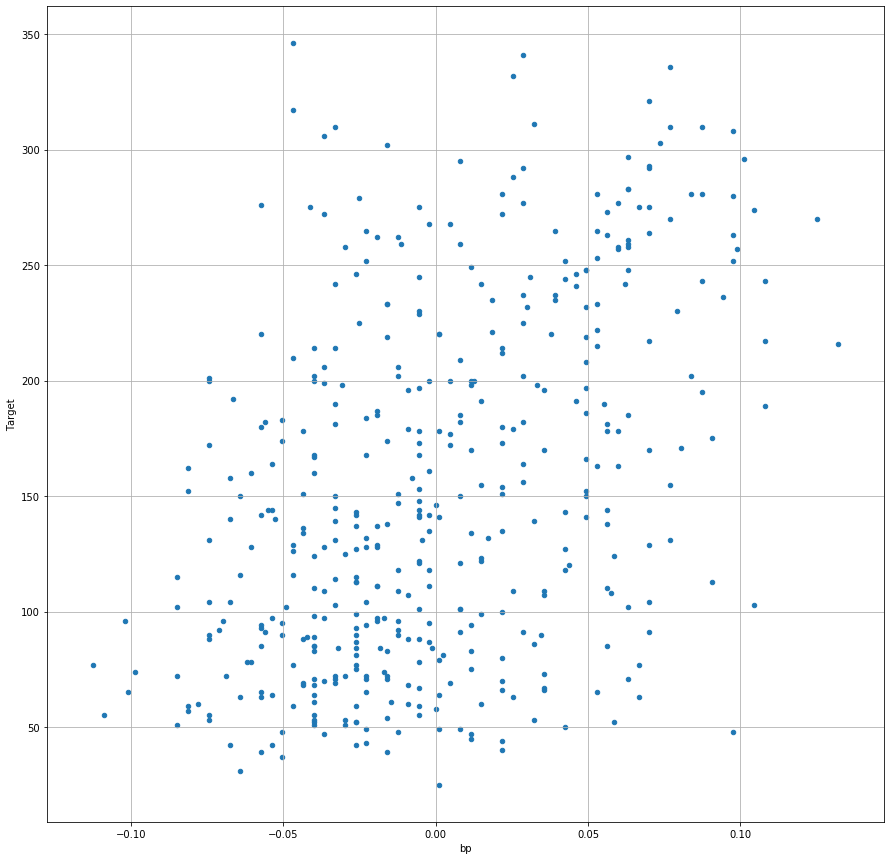

In [102]:
print("Target vs bp")
print("----- \n")
df_3.plot.scatter(x = "bp", y = "Target", figsize = (15,15), grid = True)